**Customer Segmentation based on Income and Spending**

In this project, you will see how to segment customers based on their
incomes and past spending habits. You will then identify customers that have high incomes and higher spending.

Customer segmentation can be tackled as a clustering task where customers with
similar incomes and shopping trends can be clustered together. Therefore, you will be using a clustering algorithm for customer segmentation in this project.

Clustering algorithmsa are unsupervised learning algorithms where the training data is not labeled. Rather, the algorithm cluster or group the data sets based on common characteristics.

There are 2 main types of clustering: K-Means clustering and Hierarchical clustering. In this project, you will use K-Means clustering for customer segmentation.

Before you implement actual code, lets first deeply understand the K-means cluatering.

**K-Means Clustering:**

K-means clustering is one of the most frequently used algorithm for clustering unlabeled data. In K-means clustering K refres to the number of clusters that is your data is grouped into. In K-means clustering, the number of clusters has to be defined befor applying k-means clustering to the data points.

**Steps for K-means clustering:-**

1. Randomly assigns centroid values for each cluster.

2. Calculate the Euclidean distance between each data point and centroid values for all the clusters.

3. Assign the data point to the cluster of the centroid with the shortest distance.

4. Calculate and update centroid values based on the mean values of the coordinate of all the data points of the corresponding clusters.

5. Repeat step 2-4 until new centroid values for all the clusters are different from previous centroid values.

Why use K-means clustering?

1. K-means clustering is a simple to implement algorithm.

2. Can be applied to large datasets.

3. Generalize well to clusters of various shapes and sizes.

Disadvantages of K-means clustering:-

1. The value of k has to be choosen manually.

2. Convergence or training time depends on the initial value of k.

3. Clustering performance is greately affected by the outliers.

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Load Dataset**

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Customer segmentation based on Income and spending/Mall_Customers.csv')

In [3]:
# display first 5 rows
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**CustomerID** : Unique ID assigned to the customer.

**Genre** : Gender of the customer

**Age** : Age of the customer

**Annual Income (k$)** : Annual income of the customer

**Spending Score (1-100)** : Score assigned by the mall based on customer behavior and spending nature.

In [4]:
# Display shape of dataset.
data.shape

(200, 5)

There are 200 rows and 5 columns in the dataset.

In [5]:
# display basic information about dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# display statistical information about dataset.
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
# check missing values
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
# check duplicated values
data.duplicated().sum()

0

There is no any missing value and duplicate values in the dataset.

In [9]:
# There is no use of CustomerID column in data analysis process, so we can drop from the dataset.
data.drop(['CustomerID'], axis = 1, inplace = True)

**Exploratory Data Analysis**

In [10]:
# Gender Count

# count of each gender
gender_count = data['Genre'].value_counts()
gender_count

Genre
Female    112
Male       88
Name: count, dtype: int64

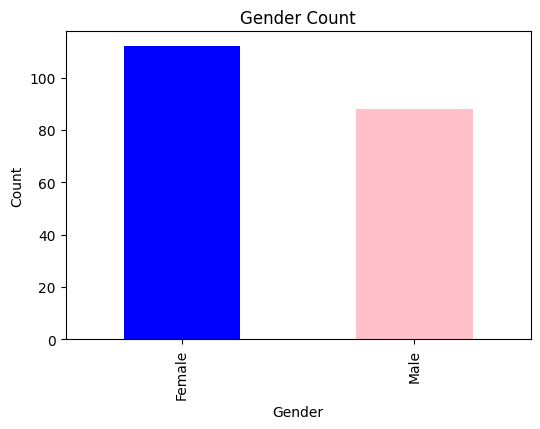

In [11]:
# Draw plot of gender count
plt.figure(figsize = (6,4))
gender_count.plot(kind = 'bar', color = ['blue', 'pink'])
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

From the above graph we can see that, Female counts - 122 and male counts - 88 hence female counts are more than male counts.

**Numerical features w.r.t. Gender**

In [12]:
numerical_features = data.select_dtypes(exclude = ['object']).columns.tolist()
numerical_features

['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

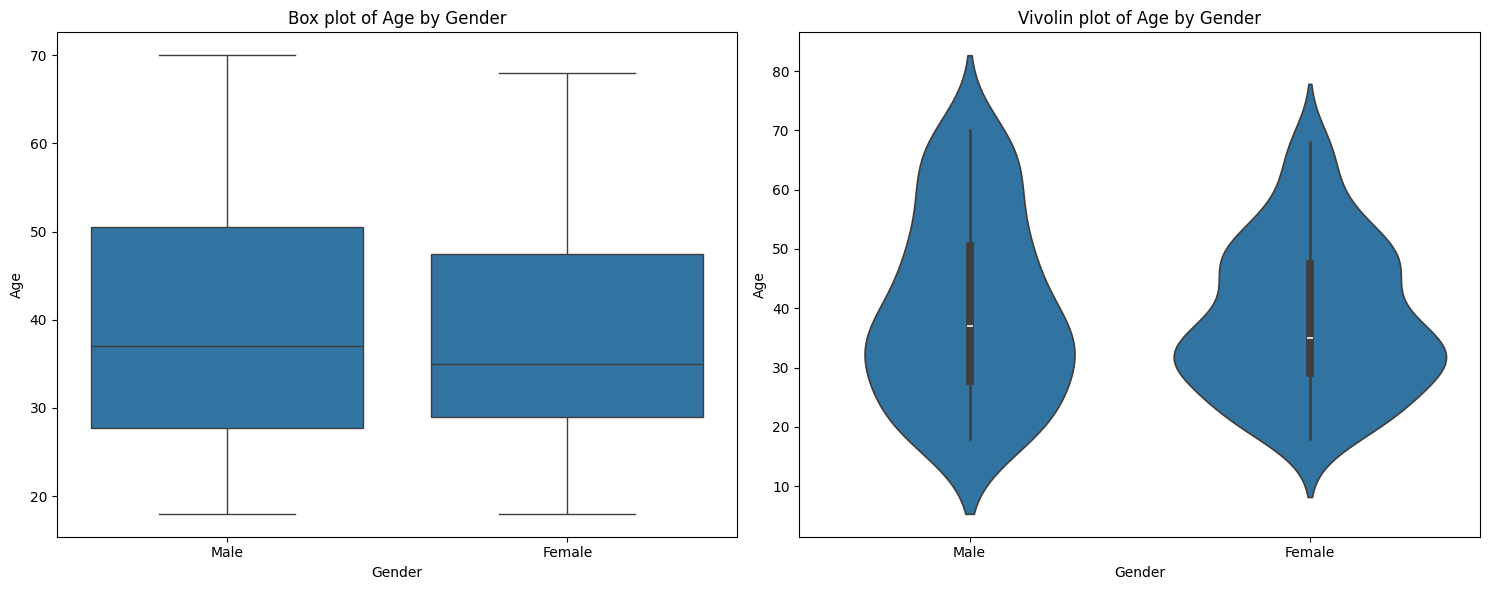

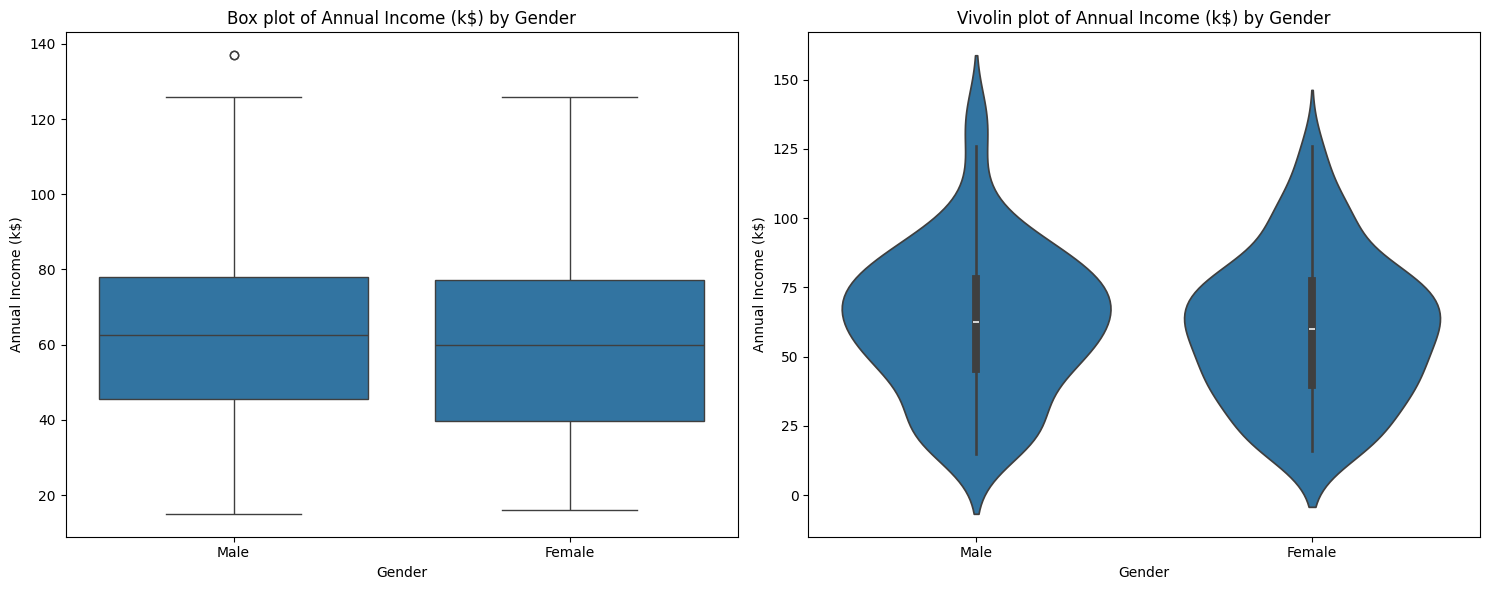

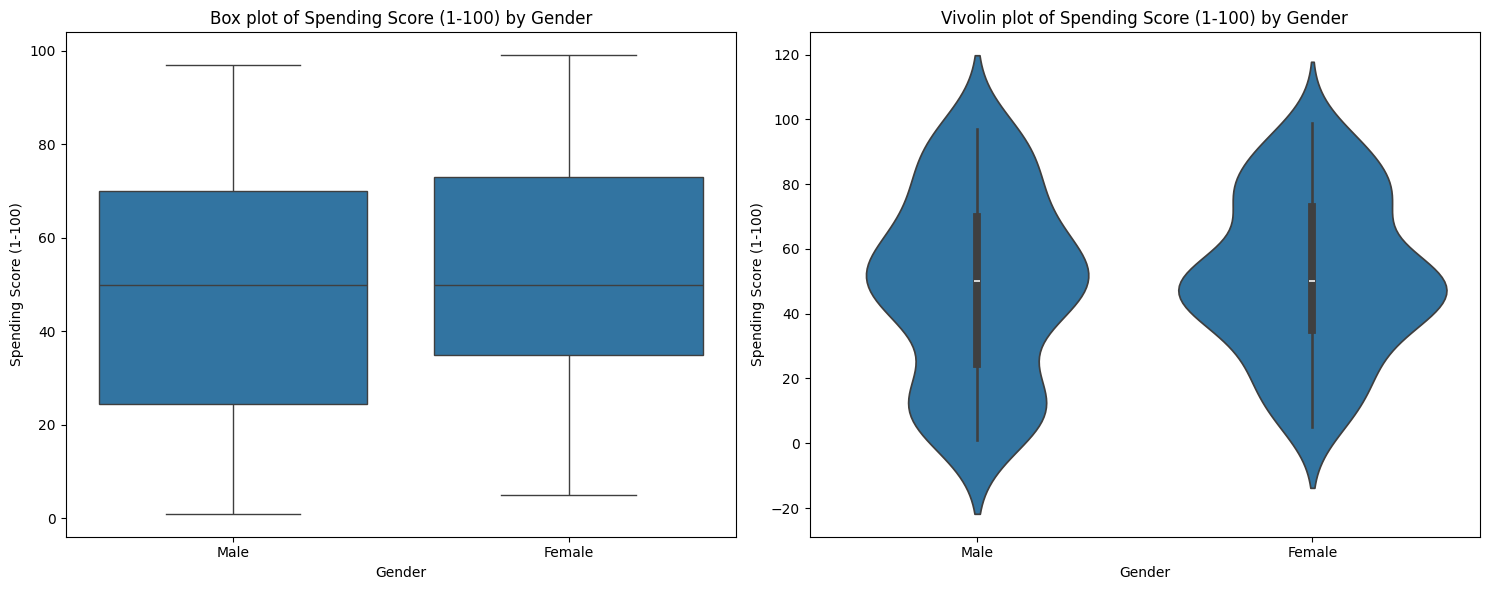

In [13]:
# Draw box plots and violin plots
for feature in numerical_features:
  plt.figure(figsize = (15, 6))

  # box plot
  plt.subplot(1, 2, 1)
  sns.boxplot(x = 'Genre', y = feature, data = data)
  plt.title(f'Box plot of {feature} by Gender')
  plt.xlabel('Gender')
  plt.ylabel(feature)

  # Violin plot
  plt.subplot(1, 2, 2)
  sns.violinplot(x = 'Genre', y = feature, data = data)
  plt.title(f'Vivolin plot of {feature} by Gender')
  plt.xlabel('Gender')
  plt.ylabel(feature)

  plt.tight_layout()
  plt.show()

- **Age:**

Females in our dataset fall between typically from age between 30 to just below 50 and male its just under 30 to 50.

Both genders seem to have a common age sweet spot around 30 to 35.

- **Annual Income:**

In Annual income, male customers earnings starts from 45k and feamle starts earnings from 40k.

The median Annual income for both male and female starts from 60k.

- **Spending Scores:**

Spending scores starts from above 20 for males and below 40 for females, the median of spending scaores is 50 fro both males and females.





**Correlation matrix**

In [14]:
new_df = data.drop(['Genre'], axis = 1)

In [15]:
corr_mat = new_df.corr(method = 'spearman')

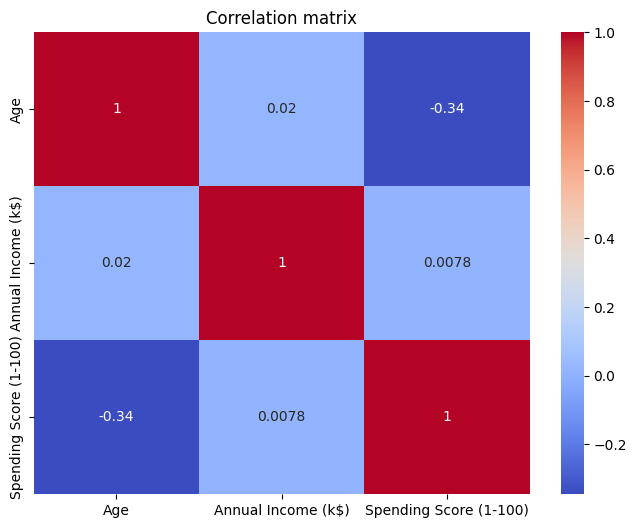

In [16]:
# Plot correlation matrix as heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(corr_mat, annot = True, cmap = 'coolwarm')
plt.title('Correlation matrix')
plt.show()

Spending score(1-100) and Age display a negative correlation i.e if value one feature is increases then another feature value decreases.

**Data Distribution**

<Axes: xlabel='Annual Income (k$)'>

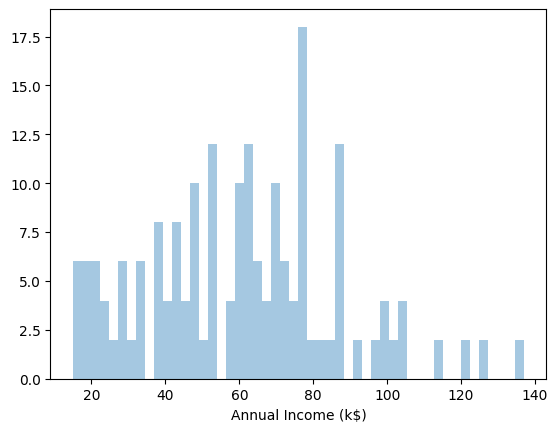

In [17]:
sns.distplot(data['Annual Income (k$)'], kde = False, bins = 50)

From the above graph we can see that, the most of the customers income between 60K to 90K.

<Axes: xlabel='Spending Score (1-100)'>

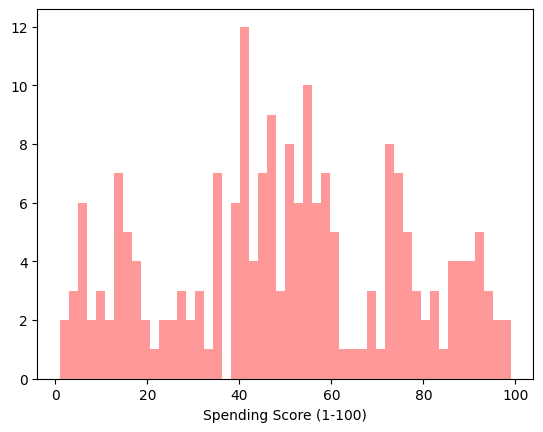

In [18]:
sns.distplot(data['Spending Score (1-100)'], kde = False, bins = 50, color = 'red')

From the above graph we can see that, most of the customers have spending score between 40 and 60.

Check any relationship between Annual income and Spending score

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

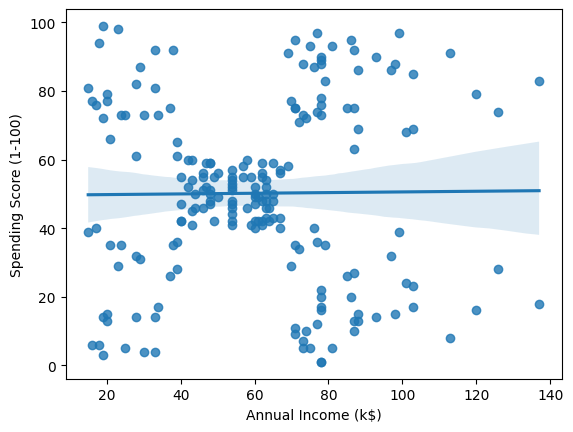

In [19]:
sns.regplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = data)

There is no any relationship between Annual income and spending score.

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

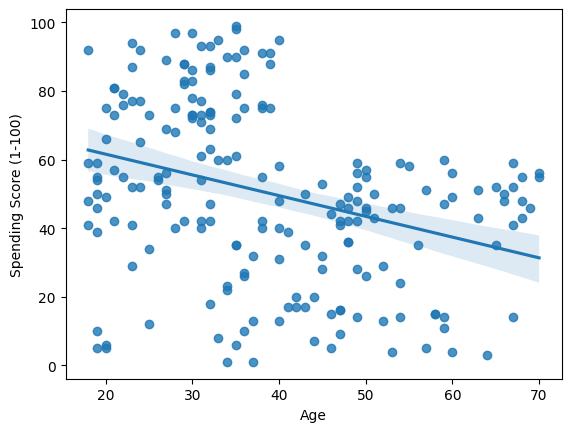

In [20]:
# Plot linear regression line between Age and Spending score columns

sns.regplot(x = 'Age', y = 'Spending Score (1-100)', data = data)

The above output shows that, there is inverse relationship between Age and Spending score columns. Young peoples age between 20 to 40 having higher spending compared to aged peoples.

**Model building : K-Means Clustering**

Now here we do customer segmentation using K-Means Clstering.

K-Means Clustering:

We want to perform K-Means clustering based on the Annual Income and Spending score columns because we want to target the customers based with high income and high spending score. Therefore here we use these 2 columns and remove other columns.

In [21]:
data = data.filter(['Annual Income (k$)', 'Spending Score (1-100)'])
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Hence there are 2 columns in the dataset.

To implement K-means clustering, you can use K-Means class from the sklearn.cluster model, You have to pass the number of clusters to the K-Means class and to fit a model you have to pass the dataset.

In [22]:
from sklearn.cluster import KMeans

In [23]:
km_model = KMeans(n_clusters = 4)
km_model.fit(data)

KMeans(n_clusters=4)

In [24]:
# print the cluster centers using cluster_center
print(km_model.cluster_centers_)

[[48.26       56.48      ]
 [86.53846154 82.12820513]
 [87.         18.63157895]
 [26.30434783 20.91304348]]


Hence the 4 clsuters are predicted by K-Means model.

Find cluster_labels to each data point. The cluster labels are cluster id. Here the number of clusters are 4 so clusters id are 4 i.e. 0,1,2,3

In [25]:
# print the cluster id for all the labels
print(km_model.labels_)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


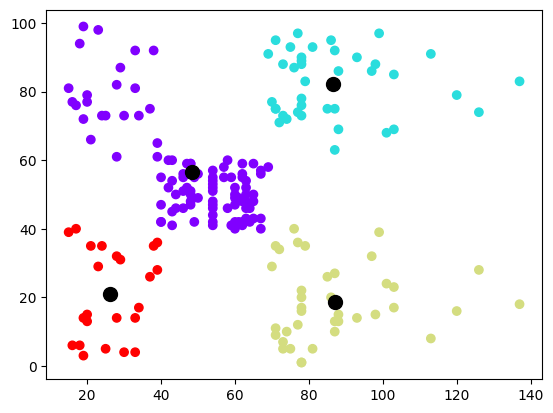

In [26]:
plt.scatter(data.values[:,0], data.values[:, 1], c = km_model.labels_, cmap = 'rainbow')
#print with centroids
plt.scatter(km_model.cluster_centers_[:, 0], km_model.cluster_centers_[:, 1], s = 100, c = 'black')

For the above result we randomly choose the value of K = 4. There is a way to find the number of clusters using **Elbow method**.

In the elbow method, the value of inertia is calculated by training K-Means clusterswith different number of K plotted on graph.

The inertia represents the total distance between the data points within a cluster. Smaller inertia means that the predicted clusters are robust and close to the actual clusters.

In [27]:
# find inertia value
loss = [ ]
for i in range(1,11):
    km = KMeans(n_clusters = i).fit(data)
    loss.append(km.inertia_)

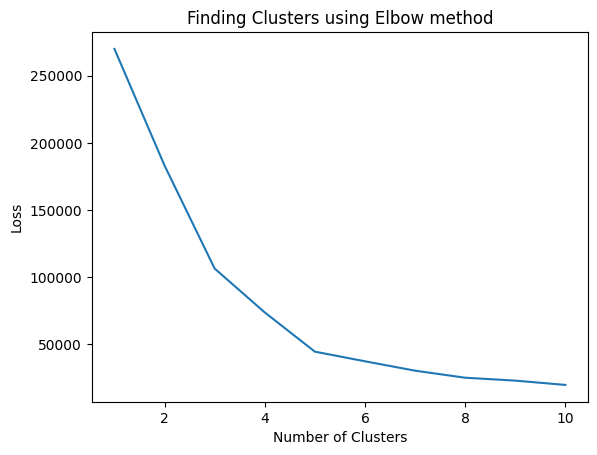

In [28]:
# print loss against number of clusters
plt.plot(range(1, 11), loss)
plt.title('Finding Clusters using Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Loss')
plt.show()

From the above graph we can see that, the value of inertia is not decrease after the value of 5.

Therefore n_clusters = 5

In [29]:
# segment our data into 5 clusters
km_model = KMeans(n_clusters = 5)
km_model.fit(data)

KMeans(n_clusters=5)

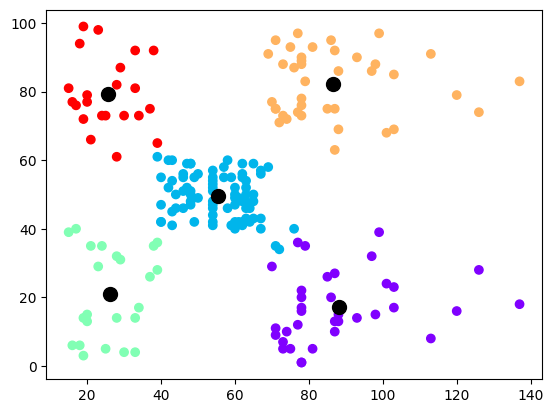

In [30]:
# print data points
plt.scatter(data.values[:, 0], data.values[:, 1], c = km_model.labels_, cmap = 'rainbow')

# print centroid of clusters
plt.scatter(km_model.cluster_centers_[:, 0], km_model.cluster_centers_[:, 1], s = 100, c = 'black')

From the above graph we can see that, the customers are divided into 5 segments. The customers in the middle of the graph with an average income and average spending. The customers with red clusters are low income and low spending. . You need to target the customers who belong to the top right cluster (sky blue). These are the customers with high incomes and high spending in the past, and they are more likely to spend
in the future, as well.

Finding customers who target for Marketting

Find the customers that belong to the sky blue clusters. For this we first plot center of the clusters.

In [31]:
print(km_model.cluster_centers_)

[[88.2        17.11428571]
 [55.2962963  49.51851852]
 [26.30434783 20.91304348]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]]


Fetch all the records from the cluster id 1, wo we first create a dataframe contaiing index values of all the records and their corresponding cluster labels.

In [32]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = data.index.values
cluster_map['clusters'] = km_model.labels_
cluster_map

,data_index,clusters
0,0,2
1,1,4
2,2,2
3,3,4
4,4,2
...,...,...
195,195,3
196,196,0
197,197,3
198,198,0


In [33]:
# get the customer columns with cluster_column is 1.
cluster_map = cluster_map[cluster_map['clusters']==1]
cluster_map.head()

,data_index,clusters
43,43,1
46,46,1
47,47,1
48,48,1
49,49,1


Here are the first five records that belong to cluster 1. These are the customers that have high incomes and high spending.
